## Introduction

* Base anchor, anchor shift의 다양한 parameter에 대한 test문서 입니다.
* 본 문서는 비공개용 입니다.

## Import Libraries

코드는 [mmdet.v0.6rc0](https://github.com/open-mmlab/mmdetection/tree/v0.6rc0)을 기준으로 참고하여 제작하였습니다. 

In [1]:
%load_ext autoreload

%autoreload 2

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import torch
import torch.nn.functional as F

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [2]:
from anchor_generator import (gen_base_anchors, get_anchors, 
                              grid_anchors, meshgrid)
from assigner import assign_wrt_overlaps, bbox_overlaps
from loss import binary_cross_entropy, smooth_l1_loss
from prediction import predict_anchors
from transforms import bbox2delta, delta2bbox
from visualize import (draw_anchor_gt_overlaps, draw_anchor_samples_on_image, 
                       draw_base_anchor_on_grid, draw_pos_assigned_bboxes)

## Base anchor test

#### test 1 : default

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


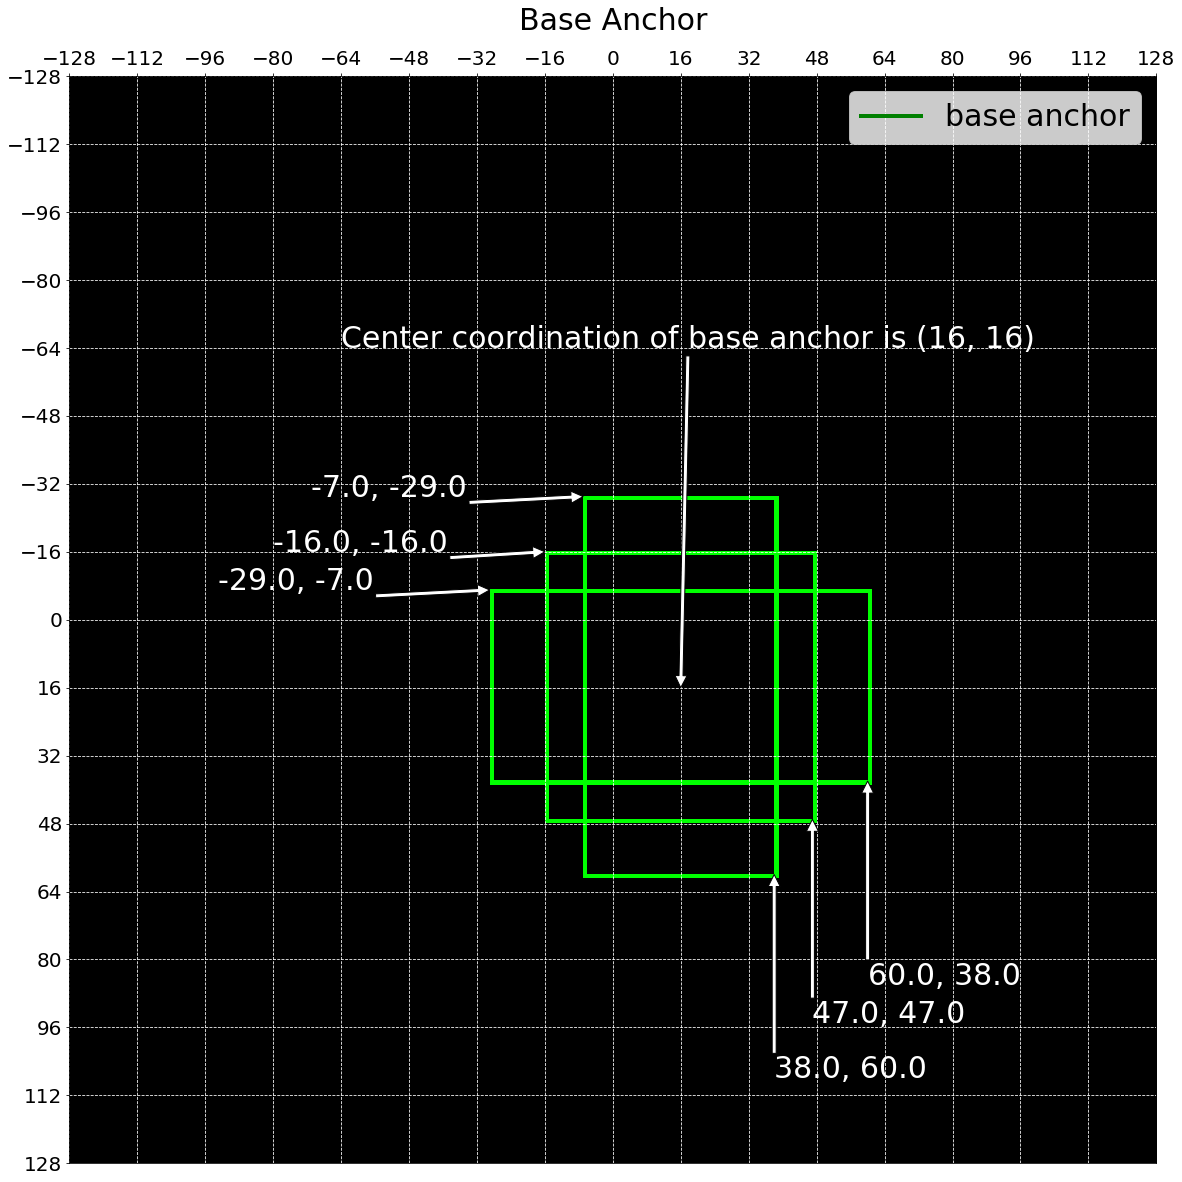

In [72]:
base_size = anchor_stride = 32
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [base_size * 8, base_size * 8, 3]
anchors_per_grid = len(scales) * len(ratios)

# x1y1x2y2
gt_bboxes_list = torch.FloatTensor([[32, 32, 32*3, 32*3]]).to(device)
base_anchor = gen_base_anchors(base_size, ratios, scales[:1])
draw_base_anchor_on_grid(base_anchor, base_size)

#### test2 : different base_size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


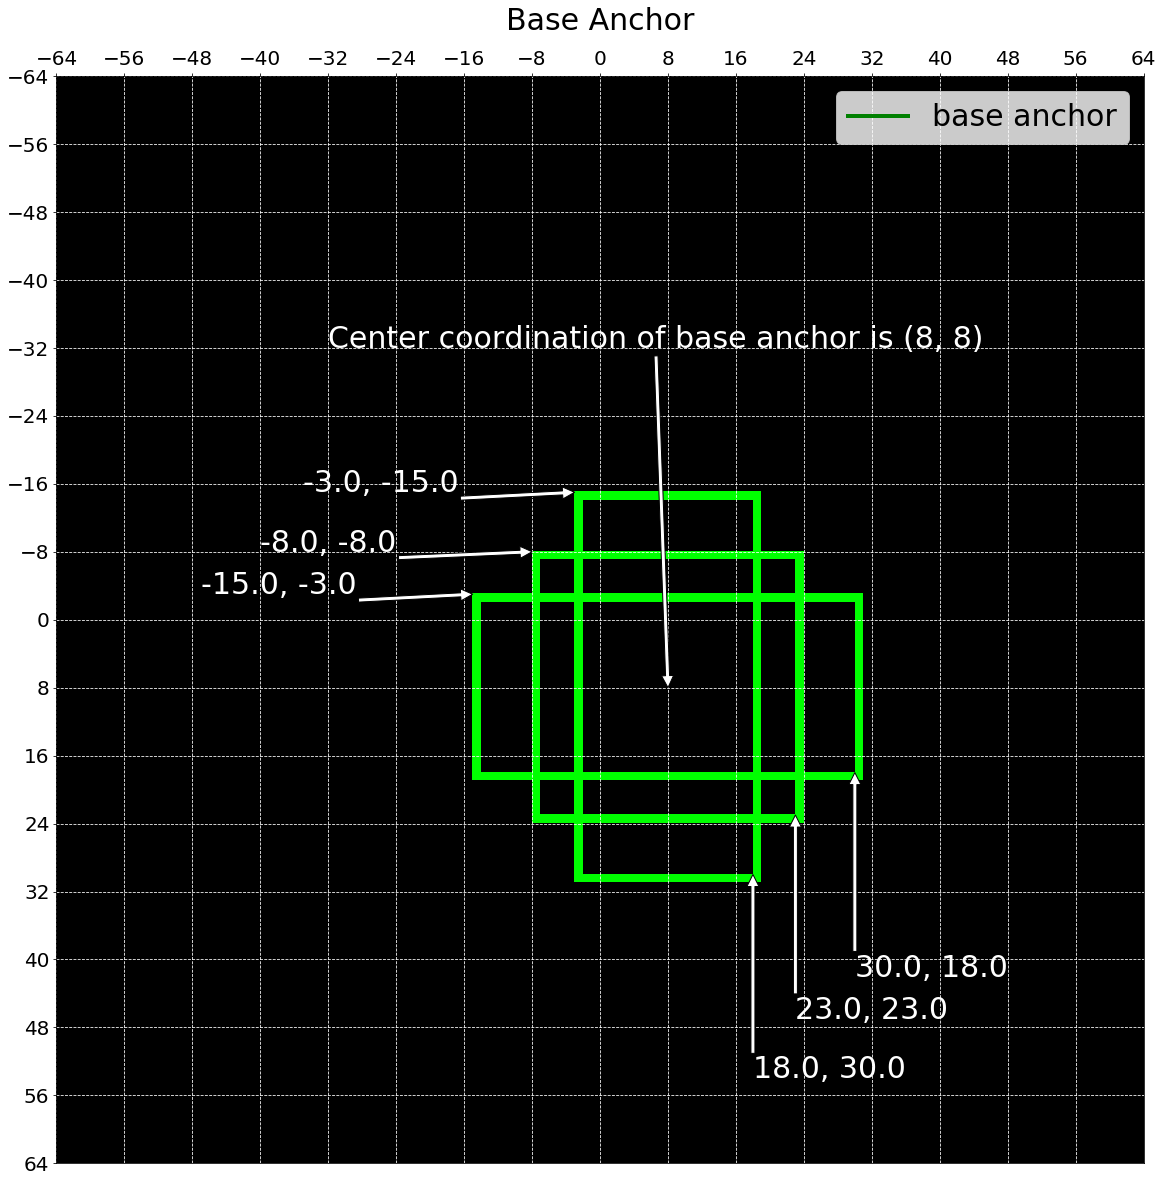

In [70]:
base_size = anchor_stride = 16
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [base_size * 8, base_size * 8, 3]
anchors_per_grid = len(scales) * len(ratios)
%autoreload 2
# x1y1x2y2
gt_bboxes_list = torch.FloatTensor([[32, 32, 32*3, 32*3]]).to(device)
base_anchor = gen_base_anchors(base_size, ratios, scales[:1])
draw_base_anchor_on_grid(base_anchor, base_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


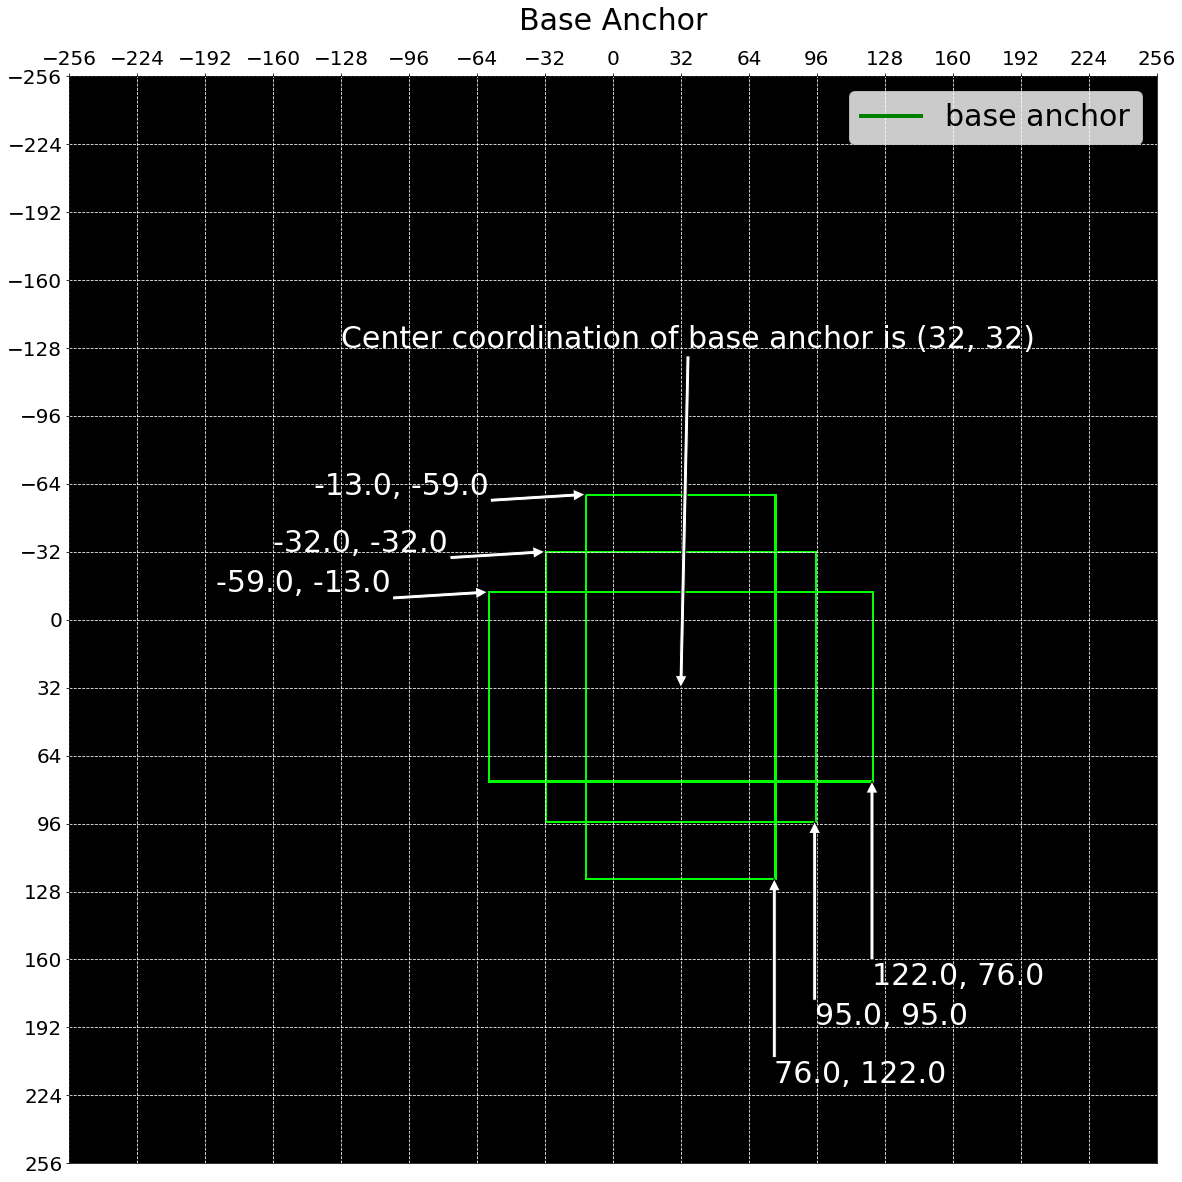

In [69]:
base_size = anchor_stride =64
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [256, 256, 3]
anchors_per_grid = len(scales) * len(ratios)

# x1y1x2y2
gt_bboxes_list = torch.FloatTensor([[32, 32, 32*3, 32*3]]).to(device)
base_anchor = gen_base_anchors(base_size, ratios, scales[:1])
draw_base_anchor_on_grid(base_anchor, base_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


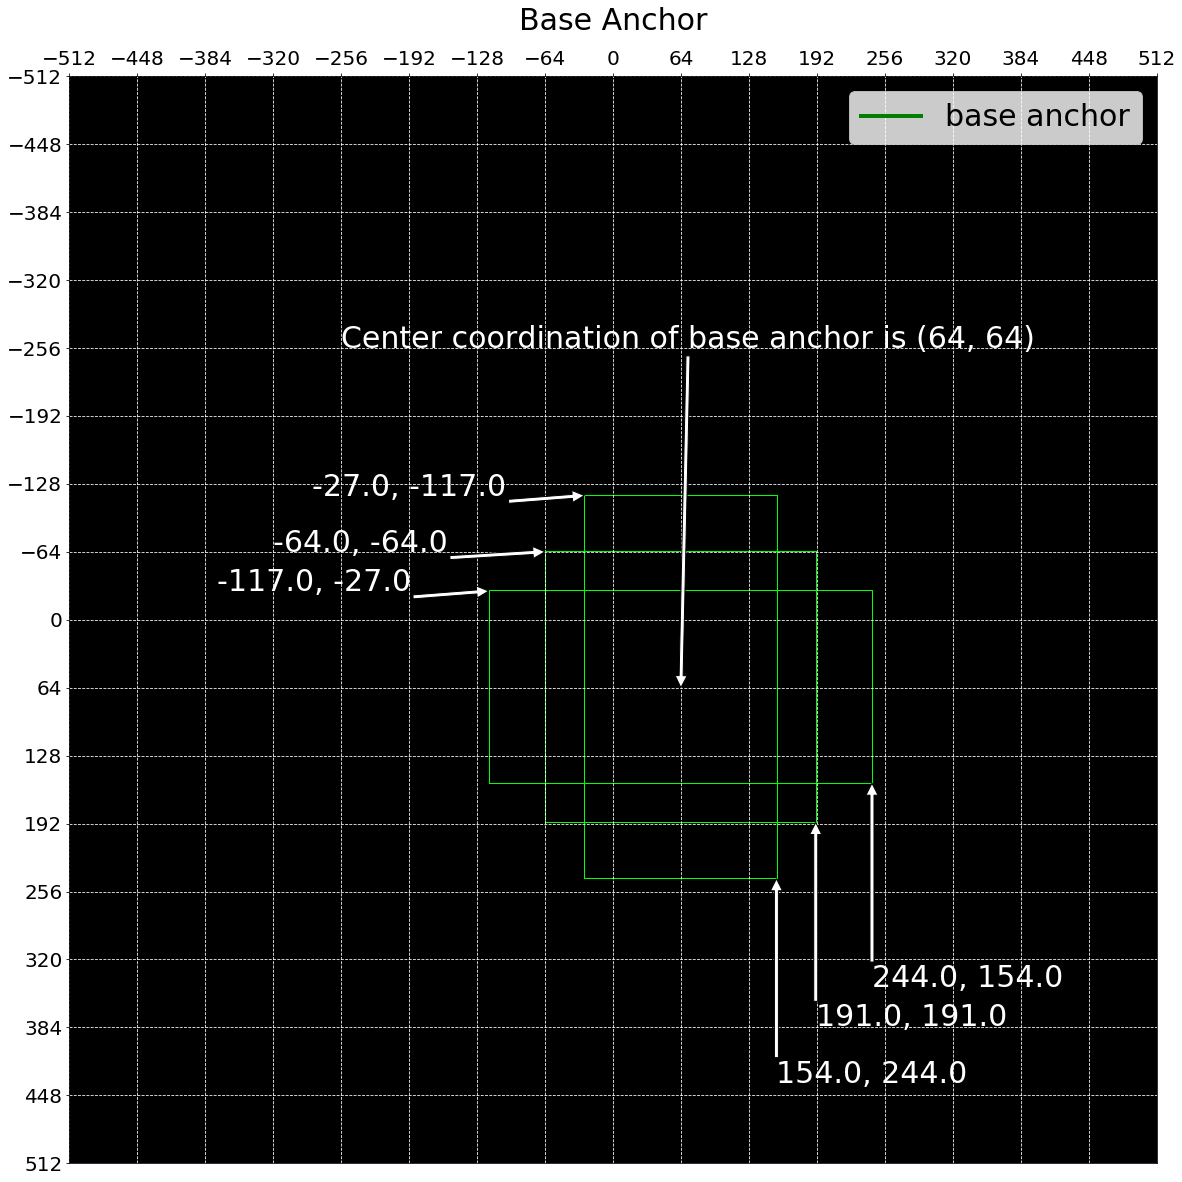

In [67]:
base_size = anchor_stride = 128
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [256, 256, 3]
anchors_per_grid = len(scales) * len(ratios)

# x1y1x2y2
gt_bboxes_list = torch.FloatTensor([[32, 32, 32*3, 32*3]]).to(device)
base_anchor = gen_base_anchors(base_size, ratios, scales[:1])
draw_base_anchor_on_grid(base_anchor, base_size)

#### test3 : scale

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


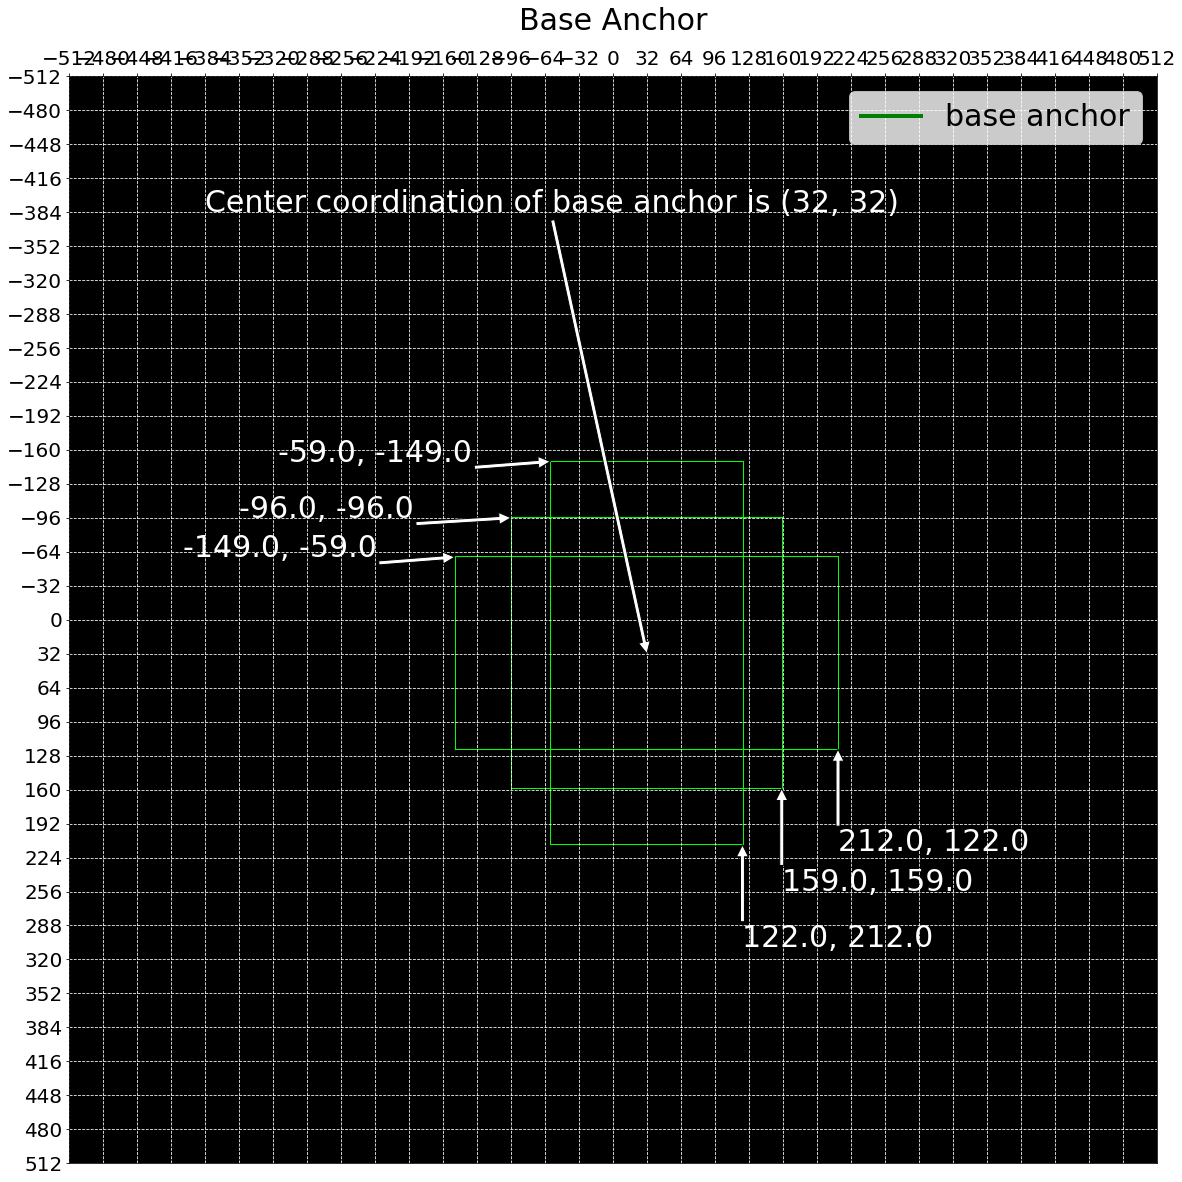

In [68]:
base_size = anchor_stride = 64
scales = torch.Tensor([4, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [32, 32]
device = 'cpu'
image_shape = [256, 256, 3]
anchors_per_grid = len(scales) * len(ratios)

# x1y1x2y2
gt_bboxes_list = torch.FloatTensor([[32, 32, 32*3, 32*3]]).to(device)
base_anchor = gen_base_anchors(base_size, ratios, scales[:1])
draw_base_anchor_on_grid(base_anchor, base_size, board_size=1024)

## Anchor shift test

#### test1 : default

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


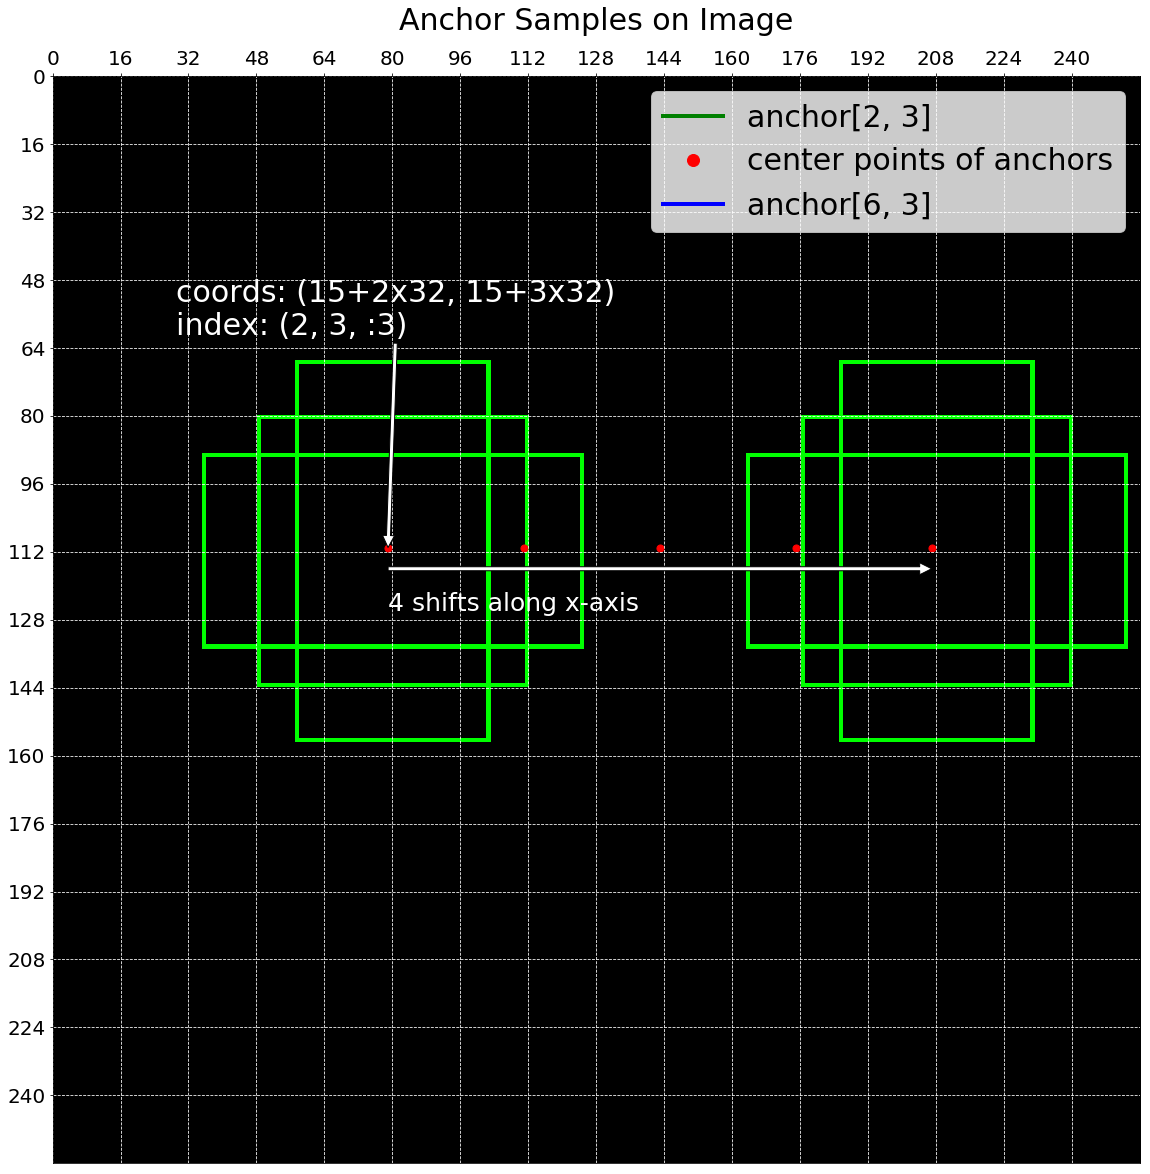

In [73]:
base_size = anchor_stride = 32
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [256, 256, 3]
anchors_per_grid = len(scales) * len(ratios)


draw_anchor_samples_on_image(image_shape, base_size, featmap_size, scales, ratios)

#### test2 : x index

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


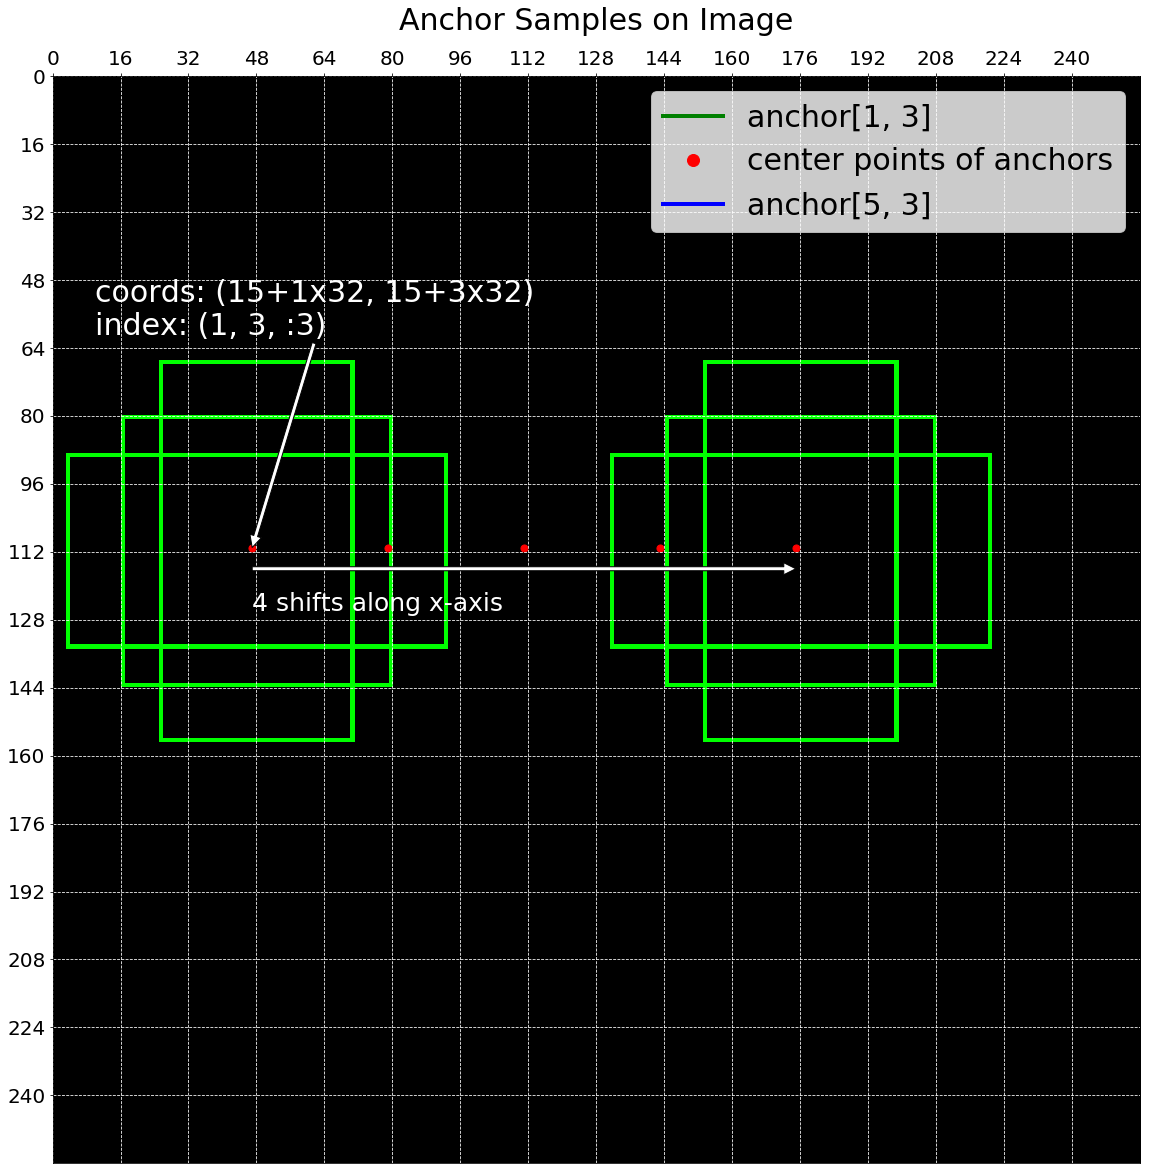

In [80]:
base_size = anchor_stride = 32
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [256, 256, 3]
anchors_per_grid = len(scales) * len(ratios)


draw_anchor_samples_on_image(image_shape, base_size, featmap_size, scales, ratios, x_idx=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


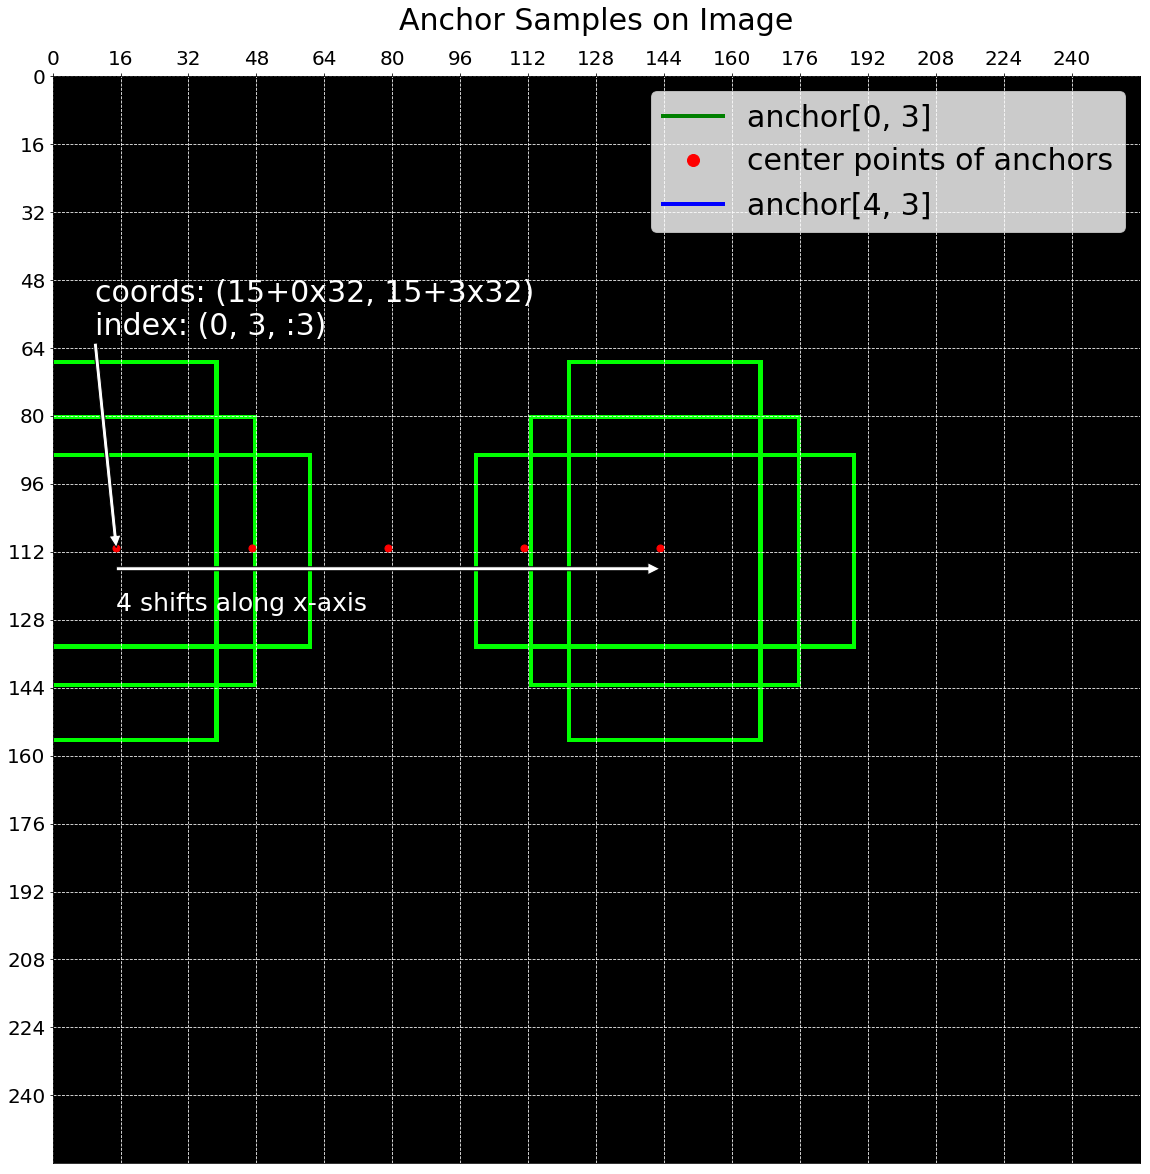

In [79]:
base_size = anchor_stride = 32
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [256, 256, 3]
anchors_per_grid = len(scales) * len(ratios)


draw_anchor_samples_on_image(image_shape, base_size, featmap_size, scales, ratios, x_idx=0)

#### test3 : shift amount

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


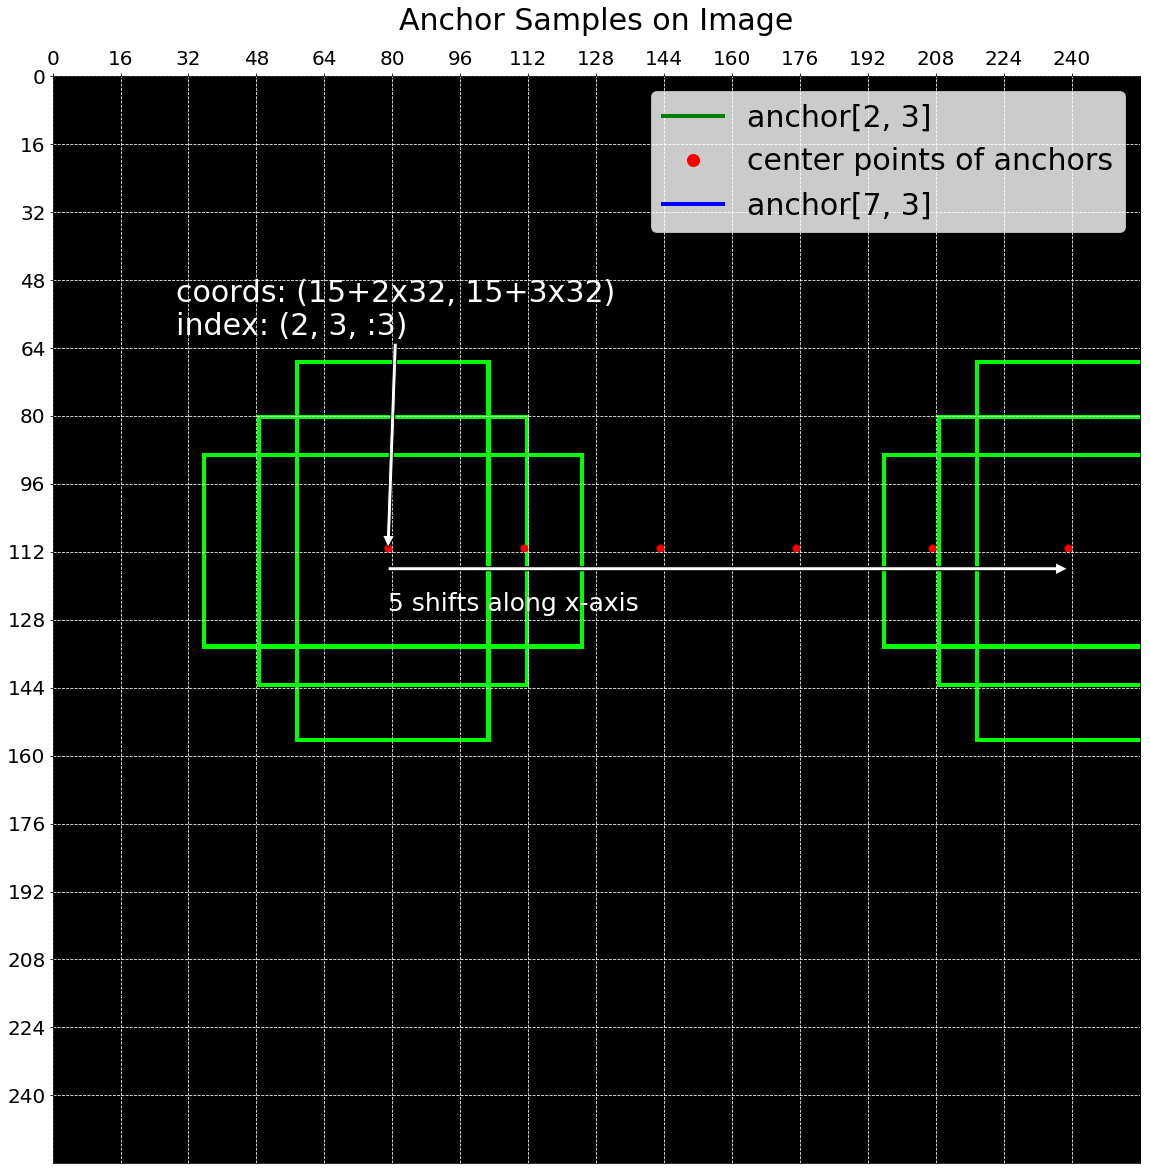

In [81]:
base_size = anchor_stride = 32
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [256, 256, 3]
anchors_per_grid = len(scales) * len(ratios)


draw_anchor_samples_on_image(image_shape, base_size, featmap_size, scales, ratios, shift_amount = 5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


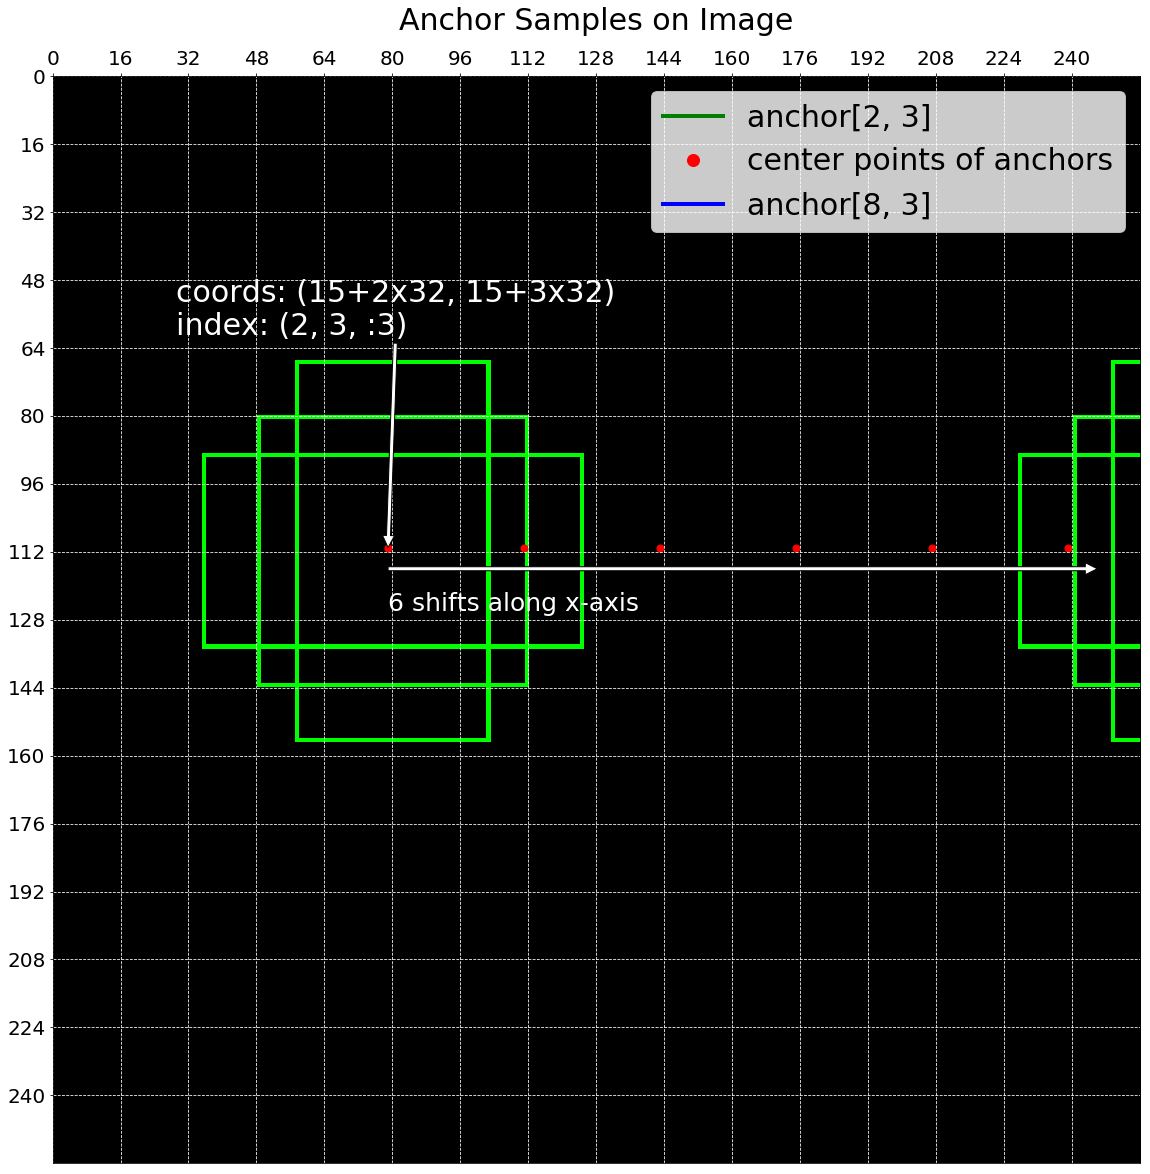

In [83]:
base_size = anchor_stride = 32
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [256, 256, 3]
anchors_per_grid = len(scales) * len(ratios)


draw_anchor_samples_on_image(image_shape, base_size, featmap_size, scales, ratios, shift_amount = 6)

#### test4 : y_idx

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


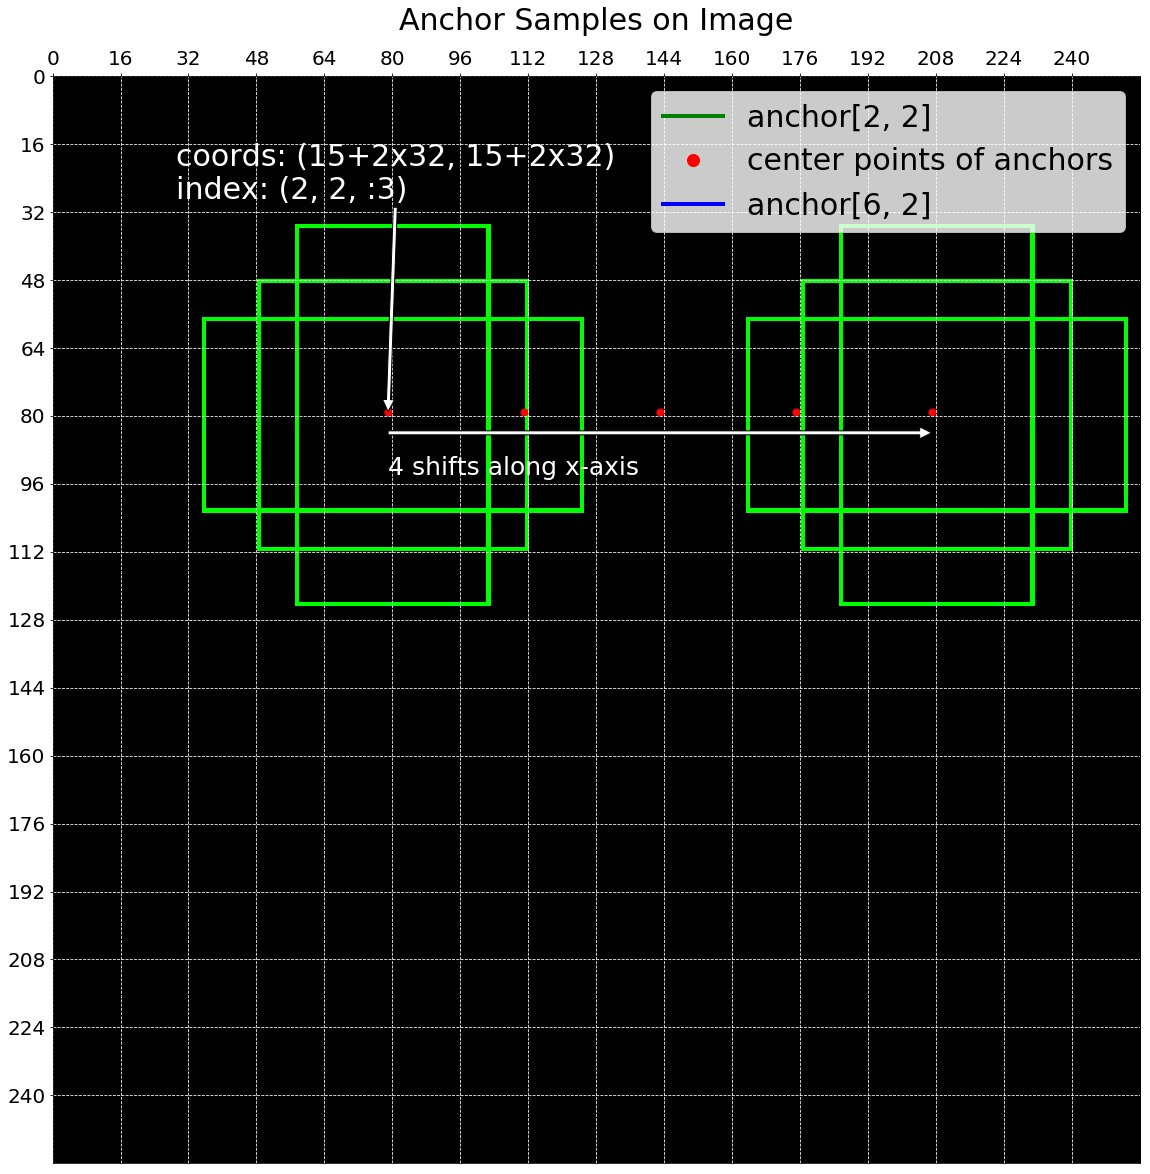

In [84]:
base_size = anchor_stride = 32
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [256, 256, 3]
anchors_per_grid = len(scales) * len(ratios)


draw_anchor_samples_on_image(image_shape, base_size, featmap_size, scales, ratios, y_idx = 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


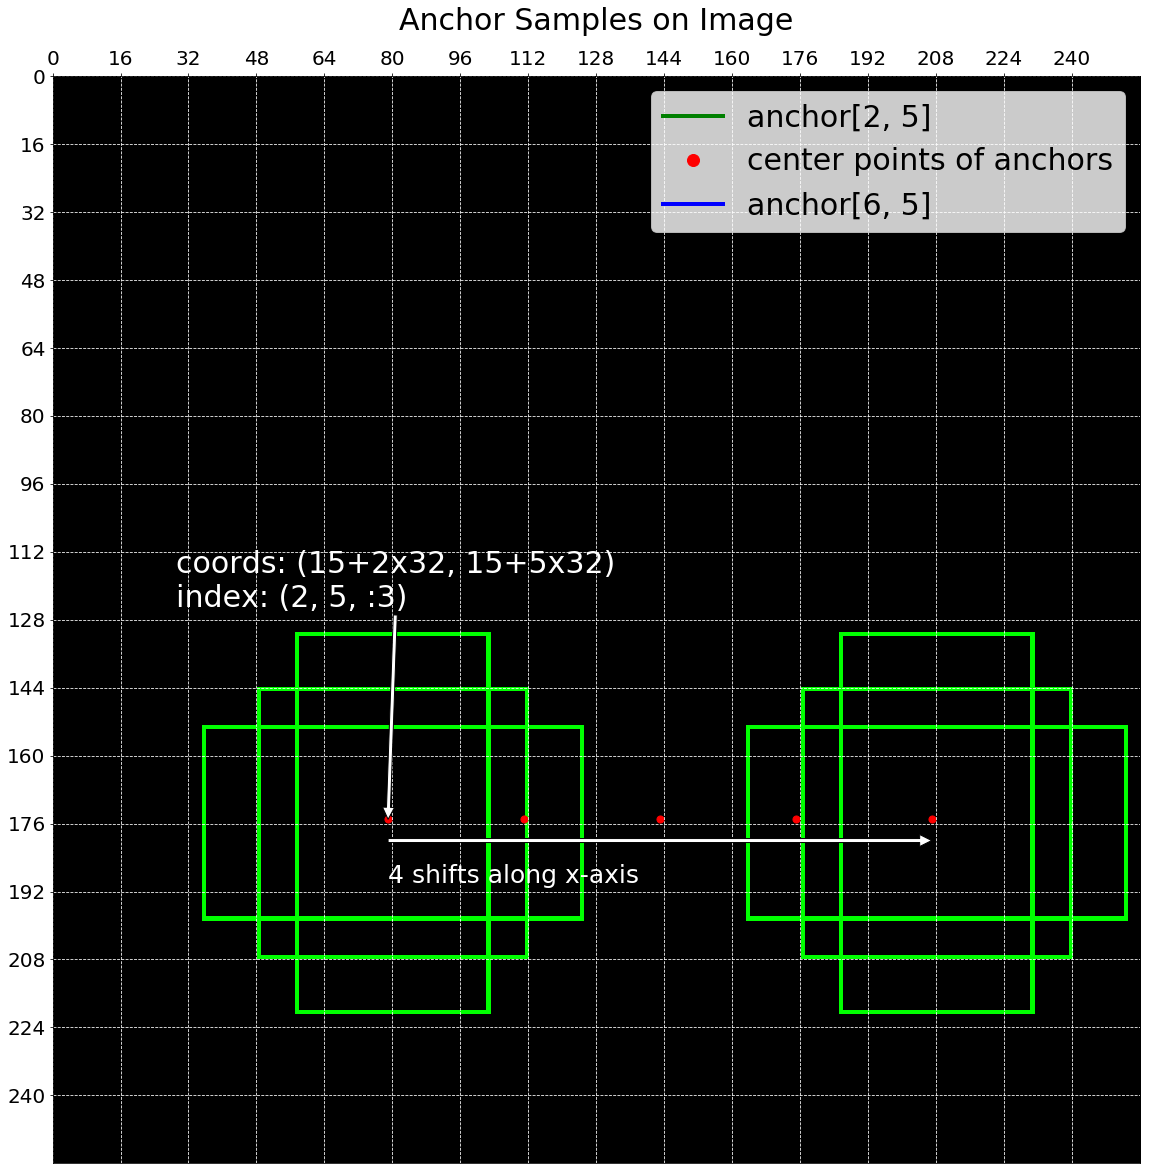

In [95]:
base_size = anchor_stride = 32
scales = torch.Tensor([2, 4, 8])
ratios = torch.Tensor([0.5, 1.0, 2.0])
featmap_size = [16, 16]
device = 'cpu'
image_shape = [256, 256, 3]
anchors_per_grid = len(scales) * len(ratios)


draw_anchor_samples_on_image(image_shape, base_size, featmap_size, scales, ratios, y_idx = 5)